## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Insert personal information (name, surname, student id)

## Understanding Perceptron Learning Algorithm (100 points +5 points)

### 1. Data Loading and Exploration (5 points)
* Brief overview of the task.
* Description of the dataset used for analysis.

In [1]:
## Import necessary libraries
!pip install ucimlrepo
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
# Features and target variables
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# metadata
print(banknote_authentication.metadata)

# variable information
print(banknote_authentication.variables)

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [4]:
print("\nFirst 5 rows of X (Numpy Array):")
print(X[:5])

print("\nFirst 5 rows of y (Numpy Array):")
print(y[:5])


First 5 rows of X (Numpy Array):
   variance  skewness  curtosis  entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880

First 5 rows of y (Numpy Array):
   class
0      0
1      0
2      0
3      0
4      0


In [5]:
print("Dataset shape (size):", X.shape)
print("\nFeature names (columns):", X.columns)

print("\nTarget variable shape (y):", y.shape)
# Summary statistics
print("\nSummary statistics:")
print(X.describe())

print("\nChecking for missing values:")
print(X.isnull().sum())

# Check for missing values
if X.isnull().sum().sum() > 0:
    X.fillna(X.mean(), inplace=True)
    print("\nMissing values filled with column mean.")
else:
    print("\nNo missing values found.")

Dataset shape (size): (1372, 4)

Feature names (columns): Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

Target variable shape (y): (1372, 1)

Summary statistics:
          variance     skewness     curtosis      entropy
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500

Checking for missing values:
variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64

No missing values found.


In [6]:
# Convert the DataFrame to a Numpy array
X_np = X.to_numpy()
y_np = y.to_numpy()

### 2. Data Preprocessing (5 points)
Explain the preprocessing steps taken and their rationale.

#### Feature Scaling Techniques:
Feature scaling is important for many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines) and gradient descent optimization (e.g., linear regression, logistic regression).

Some common feature scaling techniques include:

1. **Standardization (Z-score normalization):** It scales the features to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Scaling:** It scales the features to a fixed range, typically between 0 and 1.
3. **Robust Scaling:** It scales the features based on percentiles, making it robust to outliers.

You can use these scaled features for training your machine learning models.

Remember, the choice of feature selection and feature scaling techniques can significantly impact the performance of your models. It's essential to experiment and choose the techniques that work best for your specific dataset and machine learning tasks.

#In the code block above, I printed various values from the data. After examining the data, my initial thought is to apply Min-Max scaling to avoid issues with large values. While Min-Max scaling and Robust scaling are similar, neither approach is ideal for optimizing our dataset, as our primary concern is not the mean but rather the standard deviation. Therefore, I decided to use standardization to adjust our dataset, making it more interpretable for the computer.


In [7]:
## Analyze the dataset and decide whether scaling is needed.
## Explain your choices in a brief comment.

scaler = StandardScaler()

#Standardize X_np and y_np
X_np_scaled = scaler.fit_transform(X_np)
y_np_scaled = np.where(y_np == 0, -1, 1)
X_np_scaled

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

#### Training and Validation Split
1. Explain why it’s important to use the validation set to evaluate your model instead
of relying solely on the training data.
2. Discuss how evaluating the model on unseen
data helps in assessing its generalization capability.

 When we train a machine learning model on our dataset, it shapes itself based on the training data, which can lead to overfitting.

 If we calculate the loss value solely on the training data, we can't obtain an accurate prediction score because the model is likely overfitting to that data.

 Therefore, we split the dataset into two parts: one for training and one for validation/testing.

 By calculating the loss on the second part (which the model hasn't seen during training), we get a more reliable score, reflecting its performance on unseen data.


In [8]:
# Split the dataset into training and testing sets (80% train, 20% test)

# Print the shapes of the resulting sets
X_train, X_test, y_train, y_test = train_test_split(X_np_scaled, y_np_scaled, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (1097, 4)
Shape of X_test: (275, 4)
Shape of Y_train: (1097, 1)
Shape of Y_test: (275, 1)


### 3. Implementing Perceptron for Binary Classification (20 points)

Explain the reason behind the application of perceptron learning algorithm on this type of data.

The Perceptron algorithm is a linear classifier algorithm. It initially separates the data into two categories with a random hyperplane. Then, it adjusts misclassified data using the gradient descent algorithm to achieve the optimal classification of the data.

In [9]:
def perceptron(X, y, learning_rate=0.01, epochs=100):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0

    # training loop
    for epoch in range(epochs):
        for i in range(len(X)):
            # calculate the prediction
            prediction = np.dot(weights, X[i]) + bias

            #Activation function
            if prediction <= 0:
              prediction = -1
            else:
              prediction = 1

            # update weights and bias
            if y[i] * prediction <= 0:
                weights += learning_rate * y[i] * X[i]
                bias += learning_rate * y[i]

    return weights, bias

Discuss how the choice of learning rate and the number of epochs might affect the
training process. What happens with a very small or very large learning rate?

If the learning rate is too low, we spend significantly more time for the loss to converge. If the learning rate is too high, the loss may never converge because it won’t move precisely enough to reach the convergence point and will keep overshooting it.

If the number of epochs is too high, we will train an already converged model for an unnecessarily long period. If the number of epochs is too low, training will stop automatically before the loss can converge.

In [10]:
def accuracy(y_true, y_pred):#Accuracy calculation
    accuracy = 0
    for i in range(len(y_pred)):
      if y_true[i] * y_pred[i] > 0 :
        accuracy += 1
    accuracy /= len(y_true)
    return accuracy

#### Train the Perceptron

In [11]:
## Train the Perceptron model on the training set.
weights, bias = perceptron(X_train, y_train, 0.01 , 100)

#### Prediction on Training Data

In [12]:
# Predicting on the training data
y_pred_train = np.sign(np.dot(X_train, weights) + bias)
accuracy_train = accuracy(y_train, np.sign(y_pred_train))
print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.9890610756608933


### 4. Evaluating Perceptron for Binary Classification (25 points)

#### Prediction on Validation Data

In [13]:
## Evaluate the model's performance on the test set by calculating accuracy.
y_pred_test = np.sign(np.dot(X_test, weights) + bias)
accuracy_test = accuracy(y_test, np.sign(y_pred_test))
print("Testing Accuracy:", accuracy_test)

Testing Accuracy: 0.9854545454545455


Answer the Guiding Questions:
1. What does accuracy tell us about the performance of the model?
2. Why is accuracy sometimes not enough, especially in cases where the data is imbal-
anced? Explain a scenario where a high accuracy might be misleading.

Accuracy indicates the statistical likelihood that the model's predictions are correct. In other words, it shows the model's ability to make accurate predictions.

Accuracy may not always be sufficient, especially in cases where the data is imbalanced, as it can lead to misleading results. In imbalanced datasets, if one class is significantly more represented than the other, the model can achieve a high accuracy rate by predicting the dominant class. However, this may not reflect the true performance of the model.

In [14]:
def calculate_metrics(y_true, y_pred):#With sklearn metrics
    accuracy = accuracy_score(y_true, y_pred)

    precision = precision_score(y_true, y_pred)

    recall = recall_score(y_true, y_pred)

    f1 = f1_score(y_true, y_pred)

    return accuracy, precision, recall, f1

# Calculate and print metrics
accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train.flatten(), y_pred_train)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_train}")

Training Accuracy: 0.9890610756608933
Training Precision: 0.9875776397515528
Training Recall: 0.9875776397515528
Training F1 Score: 0.9875776397515528


Answer the Guiding Questions:
1. In what types of problems is precision more important than recall? Give an example
scenario where high precision is desirable but low recall might be acceptable.
2. In what cases is recall more critical? Discuss an example where missing true positives
is more harmful than having false positives.
3. When is the F1 score a better measure than accuracy? Explain why balancing
precision and recall is important in some contexts.
4. What are the limitations of using F1 score alone?

1.Precision is more crucial when false positives are very problematic. In these situations, it’s better to be sure that identified cases are correct, even if it means missing some actual cases. High precision means fewer incorrect predictions.

2.Recall is more critical when missing true cases is more harmful than having incorrect predictions. The focus here is on finding as many true instances as possible, even if that includes some wrong ones. High recall means the model rarely misses true positives.

3.The F1 score is better than accuracy when both false positives and false negatives matter, especially with imbalanced data. It combines precision and recall, providing a balanced view of performance. Balancing these two is important because it ensures the model is both accurate and sensitive to true cases.

4.The F1 score treats precision and recall equally, which may not fit all situations. It also doesn’t show the overall number of correct predictions and may overlook important details in specific cases. Relying only on the F1 score can miss important aspects of model performance.

### 5. Visualization of the Hyperplane (40 + 5 points)

In this section, you will explore how the Perceptron Learning Algorithm forms the de-
cision boundary (or hyperplane) that separates the two classes. To be able to do that
you will reduce the feature space to two dimensions, train the Perceptron on the selected
features, and visualize the hyperplane. The goal is to understand how the Perceptron
changes the decision boundary as the data changes, and how it adapts based on the
features used.

#### Step 1: Feature Selection Using Correlation Analysis (10 points)

1. Correlation Analysis: One effective way to reduce the number of features is by
analyzing the correlation between them. Highly correlated features may provide re-
dundant information, so you can select two less correlated features for visualization.
2. Compute the correlation matrix: Analyze the relationship between the four features
(variance, skewness, kurtosis, and entropy) to identify pairs of features with low
correlation.

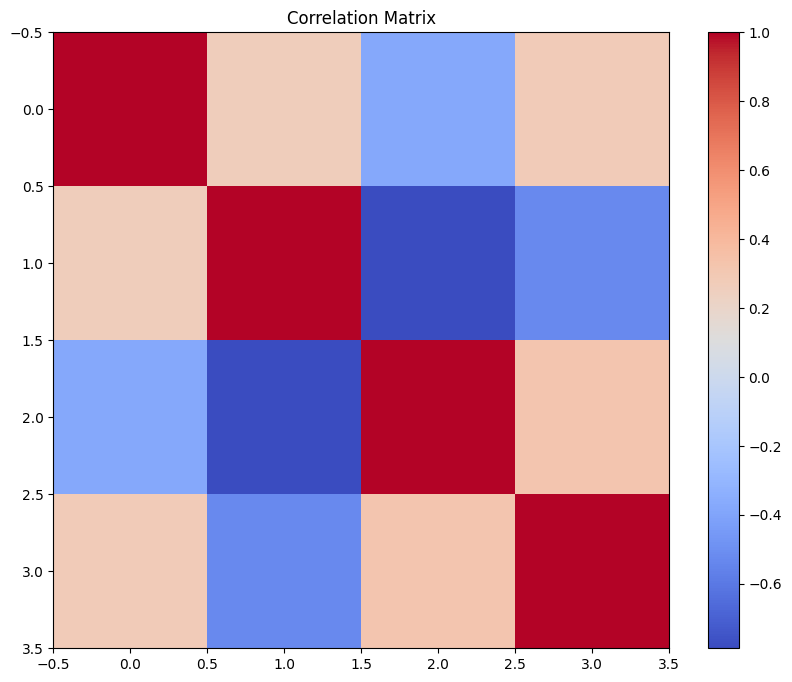

In [15]:
# Compute the correlation matrix
correlation_matrix = np.corrcoef(X_np_scaled, rowvar=False)
# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

3. Choose two features: Based on the correlation analysis, select two features that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

In [16]:
# Select two features
# Select these features from the original feature set
X_selected = X_np_scaled[:, [0]+ [2]]# Variance and Kurtosis have a correlation of -0.2. But they have best accuracy
X_S_train, X_S_test, y_train, y_test = train_test_split(X_selected, y_np_scaled, test_size=0.2, random_state=42) #Selected data

# Split the selected features into training and validation sets if not done yet

#### Step 2: Train the Perceptron on Selected Features (10 points)

1. Retrain the Perceptron: After selecting two features, train the Perceptron using
only these two features. Use the same training and evaluation process as before,
but now the model will work in a two-dimensional feature space.

In [17]:
## Train the Perceptron model on the training set.
weights, bias = perceptron(X_S_train, y_train, 0.01 , 100) #Train
# Predicting on the training data
y_pred_train = np.sign(np.dot(X_S_train, weights) + bias)
accuracy_train = accuracy(y_train, np.sign(y_pred_train))
print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.854147675478578


2. Visualize the decision boundary (hyperplane): Once the Perceptron is trained, plot
the decision boundary (hyperplane) to see how the Perceptron separates the two
classes in 2D.

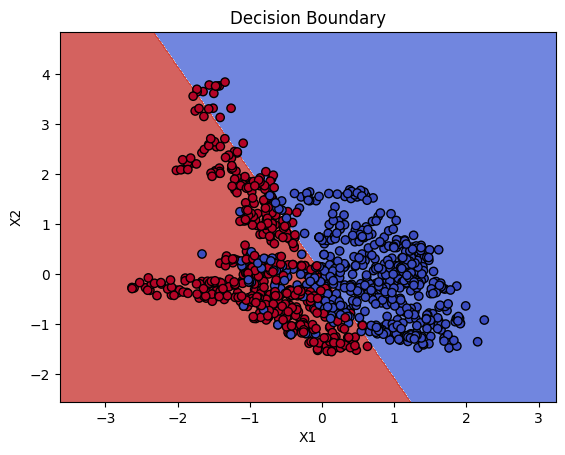

In [18]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, weights, bias): # Function to plot decision boundary with given weights and bias

    # Define the range for the plot, with padding for visibility
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid for plotting the decision boundary over the feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Compute the decision boundary by calculating the sign of the weighted sum
    # using weights and bias, instead of a model's predict function
    Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias)

    # Reshape the boundary predictions to match the mesh grid's shape
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary as a filled contour plot
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Scatter plot the actual data points with color labels based on class
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)

    # Add labels and title for the plot
    plt.title('Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')

    # Display the plot
    plt.show()

# Plot the decision boundary using the selected features and trained model
plot_decision_boundary(X_S_train, y_train, weights, bias)

#### Step 3: Experiment with Different Features (10 points)

After visualizing the decision boundary for one pair of features, try selecting different
combinations of features (e.g., variance and entropy) and retrain the Perceptron. Compare
how the hyperplane changes with different features. This helps in understanding how the
Perceptron’s decision-making process adapts to different feature sets.

Answer the guiding
questions:
1. How does the decision boundary change when you use different pairs of features?
2. Can you find a pair of features that leads to better separation between the two
classes?

1.We obtained a much worse decision boundary compared to before. This is because when two correlated features are selected, it’s as if we are analyzing noisy data with only a single feature. Not only do the two features behave like a single feature, but they also reduce the certainty of that single feature.

2.Variance and Kurtosis are best features according to accuracy.

Training Accuracy: 0.6435733819507748


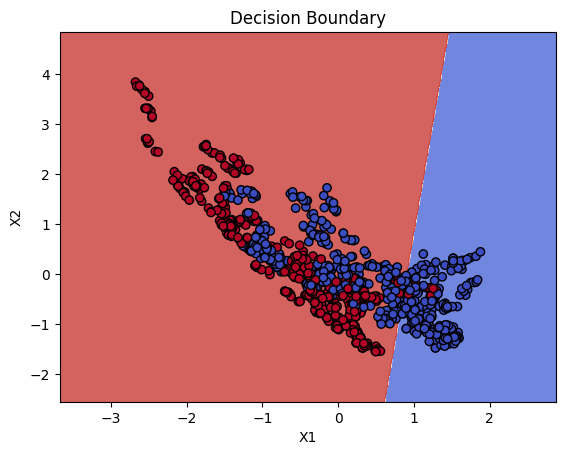

In [19]:
X_selected = X_np_scaled[:, [1]+[2]] # Skewness and Kurtosis are selected.
X_S_train, X_S_test, y_train, y_test = train_test_split(X_selected, y_np_scaled, test_size=0.2, random_state=42)

weights, bias = perceptron(X_S_train, y_train, 0.01 , 100) # Train
# Predicting on the training data
y_pred_train = np.sign(np.dot(X_S_train, weights) + bias)
accuracy_train = accuracy(y_train, np.sign(y_pred_train))
print("Training Accuracy:", accuracy_train)

# Plot the decision boundary using the selected features and trained model
plot_decision_boundary(X_S_train, y_train, weights, bias)

#### Bonus Step 4: Incrementally Add Data (+ 5 points)

1. Visualizing Incremental Learning: Another experiment to help understand the behavior of the Perceptron is to add data incrementally. Start with a small portion of
the dataset and progressively add more data points to train the Perceptron.

In [20]:
batch_size= 16
def train_incrementally(X , y , learning_rate=0.01 , epochs=100):
    weights = np.zeros(X.shape[1])  # Initialize weights with the correct shape
    bias = 0

    num_batches = len(X) // batch_size #Size of parts

    for j in range(num_batches):
      #Increase number of data lineerly
      end_index = min((j + 1) * batch_size, len(X)) #Increased data size gradually
      for i in range(end_index):
        for epoch in range(epochs): #Train model with sample data
          #Perceptron algorithm on sample data
          prediction = np.dot(weights , X[i]) + bias

          #Activation function
          if prediction <= 0:
            prediction = -1
          else:
            prediction = 1

          if prediction * y[i] <= 0:
            weights += learning_rate * X[i] * y[i]
            bias += learning_rate * y[i]

        #Train with current data

    return weights , bias

2. Observe how the decision boundary shifts: As you add more data, observe how the
hyperplane shifts and adapts to new points. This will help you understand how the
Perceptron continuously adjusts the boundary to separate the classes.

#Exp.
1.The decision boundary adjusts as more data points are added, stabilizing over time.

2.The Perceptron finds a stable boundary once all points are correctly classified if the data is linearly separable.

3.The model’s boundary is sensitive to the sequence of data points, especially in non-linearly separable cases.

In [21]:
X_selected = X_np_scaled[:, [0]+ [2]]# Variance and Kurtosis have a correlation of -0.2. But they have best accuracy of 85%
X_S_train, X_S_test, y_train, y_test = train_test_split(X_selected, y_np_scaled, test_size=0.2, random_state=42) #Selected data
weights , bias = train_incrementally(X_S_train, y_train, 0.01 , 100)

#"The accuracy of the model I trained with incremental perceptron learning increased by 2% on the training data."

y_pred_train = np.sign(np.dot(X_S_train, weights) + bias)
y_pred_test = np.sign(np.dot(X_S_test, weights) + bias)
accuracy_train = accuracy(y_train, np.sign(y_pred_train))
accuracy_test = accuracy(y_test, np.sign(y_pred_test))
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

Training Accuracy: 0.8732907930720146
Testing Accuracy: 0.8581818181818182


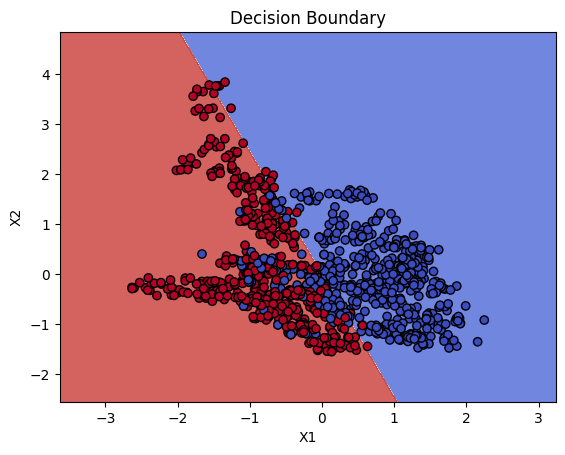

In [22]:
plot_decision_boundary(X_S_train, y_train, weights, bias)

#### Step 5: Analyzing the Hyperplane (5 points)

After running the experiments, analyze the hyperplane’s behavior across different feature
sets and data inputs. Reflect on how the Perceptron algorithm adapts to the data and how
different feature combinations lead to different decision boundaries. Anwer the guiding
questions:
1. Why does the hyperplane change with different features or data points?
2. How does the decision boundary relate to the linearly separable nature of the data?

1.The model's performance actually varies based on the selected features. The most important point here is how well the two chosen features represent the classification being performed.To optimize the model, some features may be excluded. While searching for the two features that yield the best accuracy value, I tried all possible pairs, and one of them resulted in an accuracy of 0.43. This indicates that there might be factors that degrade the classification performance in their respective two-dimensional spaces.

2.While some data provide very distinguishing features for classification, others may only add noise. For example, when distinguishing between cats and dogs, their weights are distinguishing features for us, whereas the number of ears they have does not convey anything meaningful for category separation.

#### Step 6: Fisher’s Linear Discriminant Projection (10 points)

In this step, you will implement Fisher’s Linear Discriminant (LD) to project the
dataset onto a 1D space and visualize the distribution of the two classes in the projected
space using a histogram. The goal of Fisher’s LD is to find the direction in the feature
space that maximizes the separation between two classes while minimizing the variance
within each class. This technique projects the data onto a single dimension where the
separation between the classes is optimized.

In [23]:
# Fisher's Linear Discriminant projection direction
def fisher_ld_projection(X, y):#The function has been adjusted to return 3 different outputs, including the values of the 2 sets.
    # Select data for each class
    X_class1 = []
    X_class2 = []
    for i in range(len(X)):#Manuel disrimination indeed it could made with numpy but I can't fix an error
        if y[i] == 1:
            X_class1.append(X[i])
        else:
            X_class2.append(X[i])



    # Calculate the means of each class
    mean_class1 = np.mean(X_class1, axis=0)
    mean_class2 = np.mean(X_class2, axis=0)

    # Calculate the scatter matrix for each class
    scatter_class1 = (X_class1 - mean_class1).T @ (X_class1 - mean_class1)
    scatter_class2 = (X_class2 - mean_class2).T @ (X_class2 - mean_class2)

    # Total within-class scatter matrix
    S_w = scatter_class1 + scatter_class2

    # Optimal projection direction
    direction = np.linalg.inv(S_w).dot(mean_class1 - mean_class2)#Formula in the description PDF

    return direction, X_class1, X_class2


# Project data onto the Fisher LD direction
def project_data(X, direction):
    projected_data = np.dot(X, direction)
    return projected_data


In [24]:
direction, X_class1, X_class2 = fisher_ld_projection(X_np_scaled, y_np_scaled)#Assigned coordinates of two classes with direction
#Convert numpy arrays classified lists
X_class1 = np.array(X_class1)#np transformation
X_class2 = np.array(X_class2)#np transformation

# Project the data onto the Fisher LD direction
projected_data = project_data(X_np_scaled, direction)

While not mandatory, it can be highly instructive to visualize the projection direction computed by Fisher’s LD in the original 2D feature space. This will help you understand how the data is being projected onto a 1D space and why this direction is optimal for class separation.

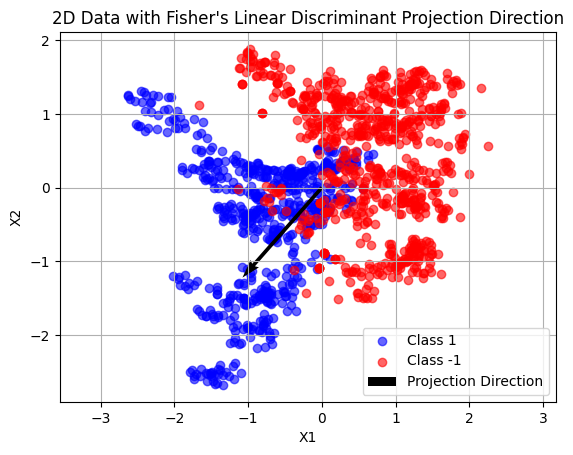

In [25]:
# Plot the 2D data with the projection direction

# Hint: You can use plt.scatter() to plot the 2D data with its features
# You can find the mean of the entire dataset for placing the direction vector
# Hint: You can use plt.quiver() method to visualize the direction vector
# Do not forget to scale the direction vector to visualize it properly
scale = 4 # Adjust this to control the length of the direction line
# Calculate the mean of the dataset for positioning the vector
mean_data = np.mean(X_np_scaled, axis=0)

# Normalize the direction vector to a unit vector and scale it for visualization
direction_normalized = direction / np.linalg.norm(direction)
scaled_direction = direction_normalized * 2  # Adjust length as needed

# Plot the 2D data points with class separation
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='blue', label='Class 1', alpha=0.6)
plt.scatter(X_class2[:, 0], X_class2[:, 1], color='red', label='Class -1', alpha=0.6)

# Plot the projection direction vector from the mean point
plt.quiver(mean_data[0], mean_data[1],
           scaled_direction[0], scaled_direction[1],
           scale=1, color='black', angles='xy', scale_units='xy',
           label='Projection Direction')

# Set plot labels and title
plt.title("2D Data with Fisher's Linear Discriminant Projection Direction")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Plot a histogram showing the distribution of the
projected data for each class in the 1D space. The histogram will help you visualize
how well the two classes are separated by the Fisher’s LD projection.

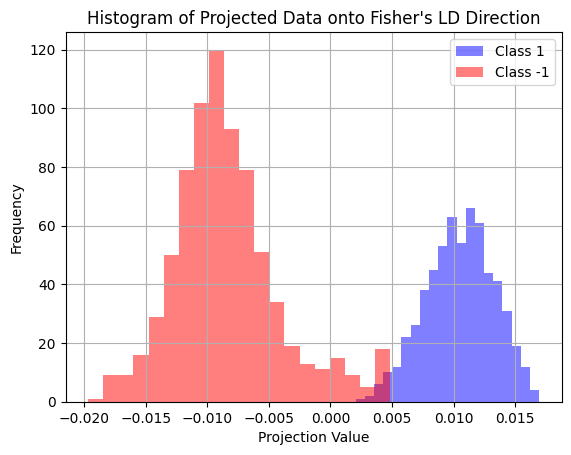

In [26]:
# Project the data onto the Fisher LD direction

# Plot the histogram of the projected data
plt.hist(projected_data[y_np_scaled[:, 0] == 1], bins=20, alpha=0.5, color='blue', label='Class 1') # Access the first column of y_np_scaled
plt.hist(projected_data[y_np_scaled[:, 0] == -1], bins=20, alpha=0.5, color='red', label='Class -1') # Access the first column of y_np_scaled
plt.title("Histogram of Projected Data onto Fisher's LD Direction")
plt.xlabel("Projection Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


Answer the guiding questions:
1. How well does Fisher’s LD separate the two classes in the 1D projected space?
2. Compare the separation of the two classes in the original 2D space (used in the
Perceptron) versus the 1D Fisher’s LD projection. What do you observe about the
class distributions in these spaces?

1.The Fisher linear approach demonstrated sufficient performance for separating the data. Although it couldn't completely separate the data into two distinct categories, this issue is more related to the overlapping of the data in certain areas rather than a problem with the approach itself.

2.The Fisher algorithm and the Perceptron learning algorithm are logically similar algorithms. However, they distinguish the data using different approaches. The Fisher algorithm separates the projections of the data in a 1-dimensional plane, while the Perceptron learning algorithm performs gradient descent in an n-dimensional space to gradually reach the optimal separation in that n-dimensional space. Since both are algorithms with a linear approach, I did not observe a significant difference in the results; however, the Fisher algorithm is computationally simpler, which allows it to conclude in a shorter time.